In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

In [3]:
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.config.experimental.set_visible_devices(devices=gpus[0], device_type="GPU")

In [5]:
# train_path_to_file = tf.keras.utils.get_file(
#     'train.zip',
#     cache_subdir='cats_and_dogs',
#     origin='https://storage.googleapis.com/kagglesdsdata/competitions/5441/38425/train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1641736738&Signature=QeHMz9Yr0jv11t8oP8eBTj%2FxZsj%2BxSSkfj65k5d0FzNv2d9Vt5lGs9JITcyZoawm6Tc8guUnkEq58qjDNyxi7%2Fg6wRSgctnZ6oHFRx6F7liEtlQb%2F1FnhAOkrxqLIgbu9%2FmVKoXLnk02Dqj9Hc0BBeSyV3P5svKbn4%2FFCWoWaTjgY9oqS1IIUDUhOy71t%2FuX1EEbH2%2FwquCEG%2F3OM3zK3lrQbf1O3uAC3R%2Bka%2F28mYrUGPKZf4GdRH8e%2BA%2Bv0Ky5NhRUclGMfN6LdvrSgy9%2BZIaBeZFxKEvKkTBSLcfynungAKN4%2Bi5mwgCctBR7J26mlHlP6vWKR2ET7yZ16QM12w%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.zip',
#     extract=True
# )

In [6]:
# test_path_to_file = tf.keras.utils.get_file(
#     'test.zip',
#     cache_subdir='cats_and_dogs',
#     origin='https://storage.googleapis.com/kagglesdsdata/competitions/5441/38425/test.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1641736717&Signature=eyHTxDC8vvViWjKrU4mCqZxhs92l%2BNhgxpoAME0TaW8cOApu4Ax2QKgecLT7EcL9fOVzMZfDhthwMY1yiWNddldh5cOSrtjo9saIifwDagwEop9l5yuEaem3r5gEeh%2FkD4Cg4s%2BMH6LbHHPKy6461h4v7N3RQ4HLBC0ntKwhsjm0iECSbZir1rUZLBGenPOZodRA5hBu1V3qXu%2FRDLybrXau45jv%2Fg8cQaufAr5X0gzPoL8F%2Fz7TW4owC6w69dXkcGuE3q1uaO7mgz4dQC8c9wlPryNXvnrZZ6RSz43pR%2BuVBmUY30AKIr5UaavANy%2F9BH0pBXnwWdUelSB7CkLBfA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.zip',
#     extract=True
# )


In [7]:
# import pathlib
# pathlib.Path(train_path_to_file).parent

In [8]:
train_dir = 'C:/Users/Administrator/.keras/cats_and_dogs/train'
test_dir = 'C:/Users/Administrator/.keras/cats_and_dogs/test'

In [9]:
import os

In [10]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

os.path.exists(train_dogs_dir)

True

In [11]:
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

os.path.exists(train_cats_dir)

True

In [12]:
len(os.listdir(train_cats_dir))

12500

In [13]:
import re
import shutil

train_name_list = os.listdir(train_dir)

for i in range(len(train_name_list)):
    path = os.path.join(train_dir,train_name_list[i])
    if re.search('cat', train_name_list[i]):
        shutil.move(path, train_cats_dir)
    if re.search('dog', train_name_list[i]):
        shutil.move(path, train_dogs_dir)

In [14]:
len(os.listdir(train_dogs_dir))

12500

In [15]:
len(os.listdir(train_cats_dir))

12500

In [16]:
train_dogs_name_list = os.listdir(train_dogs_dir)
len(train_dogs_name_list)

12500

In [17]:
train_cats_name_list = os.listdir(train_cats_dir)
len(train_cats_name_list)

12500

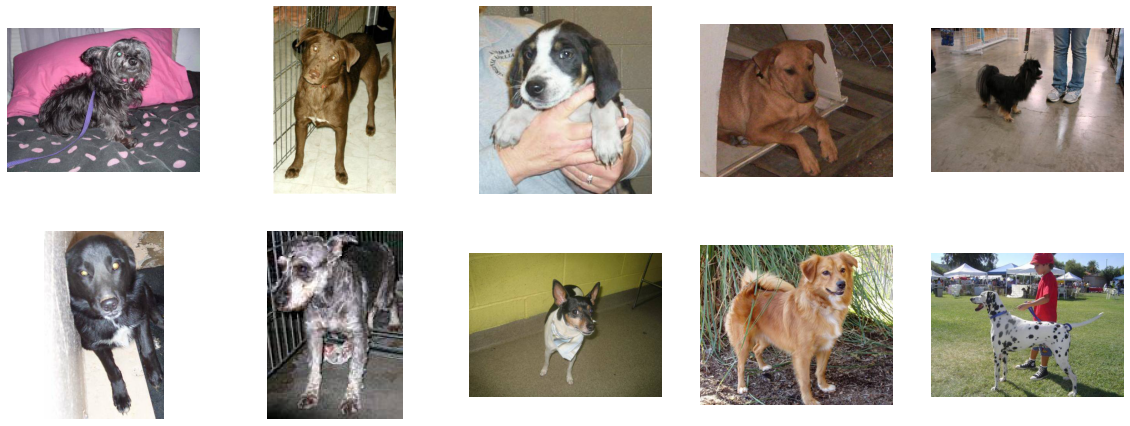

In [18]:
import PIL
import matplotlib.pyplot as plt

cats_filepath = train_cats_dir
fig = plt.figure(1, figsize=(20,20))

for i in range(10):
    plt.subplot(5, 5, i + 1)
    pic = PIL.Image.open(os.path.join(train_dogs_dir, train_dogs_name_list[i]))
    plt.imshow(pic)
    plt.axis('off')
plt.show()

In [19]:
# import PIL
# import matplotlib.pyplot as plt

# cats_filepath = train_cats_dir
# fig = plt.figure(1, figsize=(20,20))

# for i in range(10):
#     plt.subplot(5, 5, i + 1)
#     pic = PIL.Image.open(os.path.join(train_cats_dir, train_cats_name_list[i]))
#     plt.imshow(pic)
#     plt.axis('off')
# plt.show()

In [20]:
from tensorflow.keras import Model, layers
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(
    input_shape=(224, 224, 3), include_top=False, weights=None
)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
    
# pre_trained_model.summary()

In [21]:
last_layer = pre_trained_model.get_layer('mixed7')
last_layer

In [22]:
last_layer.output_shape

(None, 12, 12, 768)

In [23]:
last_output = last_layer.output
last_output.shape

TensorShape([None, 12, 12, 768])

In [24]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)
model.summary()#

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [33]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics='accuracy')

img_height = 224
img_width = 224
batch_size = 32

from  tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    subset="training",
)

val_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation",
)



from datetime import datetime

logdir = 'logs/fit/' + datetime.now().strftime("%Y%m%d-%H%M%S") + "baseline"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_steps=50,
    verbose=1,
    callbacks=[tensorboard_callback]
)
     

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 14s 119ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.1017 - val_accuracy: 0.9894
Epoch 2/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0833 - val_accuracy: 0.9894
Epoch 3/100
100/100 [==============================] - 11s 109ms/step - loss: 0.0099 - accuracy: 0.9984 - val_loss: 0.1011 - val_accuracy: 0.9906
Epoch 4/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0238 - accuracy: 0.9987 - val_loss: 0.0723 - val_accuracy: 0.9887
Epoch 5/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0598 - val_accuracy: 0.9906
Epoch 6/100
100/100 [==============================] - 11s 108ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.1270 - val_accuracy: 0.9887
Epoch 7/100
100/100 [==================

In [34]:
test_datagen = ImageDataGenerator(rescale=1/255)
dir = 'C:/Users/Administrator/.keras/cats_and_dogs/test'
test_generator = test_datagen.flow_from_directory(
    dir,
    shuffle=False,
    target_size=(img_height, img_width),
    batch_size=batch_size,
)


test_generator.reset()

pred = model.predict(test_generator, verbose=2)

import numpy as np
id = np.array(tf.range(12500) + 1).reshape([12500, 1])
results = np.array(tf.concat([id, pred], 1))

import csv
def write_csv(results, file_name):
    with open(file_name, "w", encoding='utf-8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['id', 'label'])
        writer.writerows(results)
write_csv(results, 'test 3.csv')

Found 12500 images belonging to 1 classes.


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


391/391 - 30s


In [40]:
pre_trained_model.trainable = True
finetune_at = 100
for layer in pre_trained_model.layers[:finetune_at]:
    layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
x = layers.Flatten()(last_layer.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics='accuracy')

In [42]:

from datetime import datetime

logdir = 'logs/fit/' + datetime.now().strftime("%Y%m%d-%H%M%S") + "-transfer-learning-finetune84"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_steps=50,
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/100
100/100 [==============================] - 17s 168ms/step - loss: 0.0318 - accuracy: 0.9903 - val_loss: 0.1992 - val_accuracy: 0.9762
Epoch 2/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0359 - accuracy: 0.9916 - val_loss: 0.2086 - val_accuracy: 0.9862
Epoch 3/100
100/100 [==============================] - 16s 162ms/step - loss: 0.0139 - accuracy: 0.9950 - val_loss: 0.1236 - val_accuracy: 0.9856
Epoch 4/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.1910 - val_accuracy: 0.9819
Epoch 5/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0364 - accuracy: 0.9922 - val_loss: 0.1471 - val_accuracy: 0.9806
Epoch 6/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0184 - accuracy: 0.9950 - val_loss: 0.2256 - val_accuracy: 0.9819
Epoch 7/100
100/100 [==============================] - 16s 163ms/step - loss: 0.0351 - accuracy: 0.9944 - val_loss: 0.2897 -